<a href="https://colab.research.google.com/github/Vinaypatil-Ev/vinEvPy-GoCoLab/blob/main/Tensorflow/TensorflowPrac19_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
descriminator = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, 3, strides=(2, 2), padding="same"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Conv2D(128, 3, strides=(2, 2), padding="same"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(1),
])

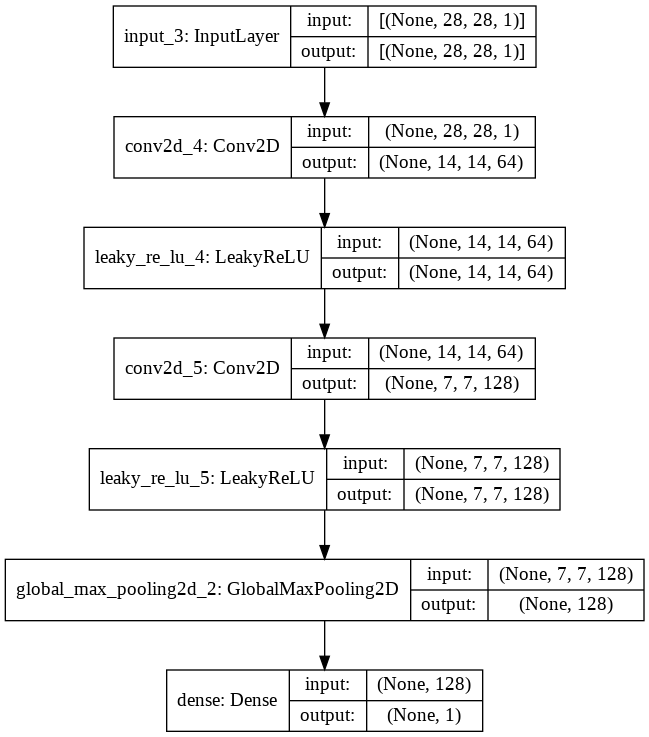

In [ ]:
tf.keras.utils.plot_model(descriminator, show_shapes=True)

In [ ]:
latent_dim = 128
generator = tf.keras.Sequential([
    tf.keras.Input(shape=(latent_dim, )),
    tf.keras.layers.Dense(7 * 7 * 128),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Reshape((7, 7, 128)),
    tf.keras.layers.Conv2DTranspose(128, 4, strides=(2, 2), padding="same"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Conv2DTranspose(128, 4, strides=(2, 2), padding="same"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
])

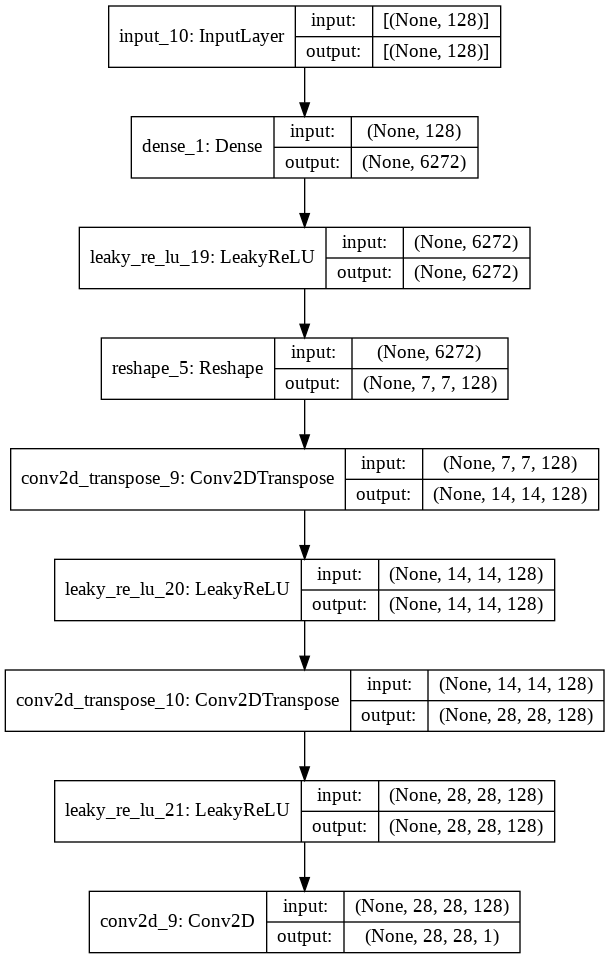

In [ ]:
tf.keras.utils.plot_model(generator, show_shapes=True)

In [ ]:
(x_trn, _), (x_tst, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
from google.colab.patches import cv2_imshow as imshow

In [ ]:
i = 5 
img = x_trn[i]
imshow(img)

In [ ]:
img.shape

(28, 28)

In [ ]:
img2 = x_trn[i].reshape(-1, 28, 28, 1)

In [ ]:
img2.shape

(1, 28, 28, 1)

In [ ]:
imshow(img2)

In [ ]:
imshow(img.reshape(28, 28, 1))

In [ ]:
type(img)

numpy.ndarray

In [ ]:
dim0 = tf.shape(img2)[0]
dim1 = latent_dim
print(dim0, dim1)

tf.Tensor(1, shape=(), dtype=int32) 128


In [ ]:
latent_vector = tf.random.normal((dim0, dim1))
latent_vector.shape

TensorShape([1, 128])

In [ ]:
gen_img = generator(latent_vector)
gen_img.shape

TensorShape([1, 28, 28, 1])

In [ ]:
imshow(tf.squeeze(gen_img).numpy())

In [ ]:
combine_img = tf.concat([gen_img, img2], axis=0)
combine_img.shape

TensorShape([2, 28, 28, 1])

In [ ]:
pred1 = descriminator(combine_img)
pred1.shape

TensorShape([2, 1])

In [ ]:
pred2 = descriminator(generator(latent_vector))
pred2.shape

TensorShape([1, 1])

In [ ]:
pred1

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[4.6242066e-03],
       [1.2330736e+01]], dtype=float32)>

In [ ]:
pred2

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00462421]], dtype=float32)>